In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# read csv with BERTopic Clusters
df=pd.read_csv("document_clusters.csv")
# include only unneccessary columns
list_of_cols=(list(df.columns))[:15]+["created_utc","created","score","author"]
df=df[list_of_cols]
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

/Users/charlesalba/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/charlesalba/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def clean_topic_representation(topic):
    '''
    Parameters:
        topic (str): topic number obtained from BERTopic
    Returns:
        A string from this format: 0_psychiatrist_seek_affordable_attacks to Topic 0: psychiatrist, seek, affordable, attacks
    '''
    parts = topic.split('_')
    # The first part is the numeric index
    index = parts[0]
    # The remaining parts are the words
    words = ', '.join(parts[1:])
    # Format the output as required
    formatted = f"Topic {index}: {words}"
    return(formatted)
df["Name"]=df["Name"].apply(clean_topic_representation)

themes={"Access to Health Resources":[0,11,14],
        "Family & Social Relationships":[1,3,8,9],
       "Educational & Career pressures": [5,6,7],
        "Incident-Driven or Trigger Events":[4,10,12,13]}
theme_mapping = {topic: theme for theme, topics in themes.items() for topic in topics}

# Map the topics in the 'Topic' column to their corresponding themes
df['Theme'] = df['Topic'].map(theme_mapping)

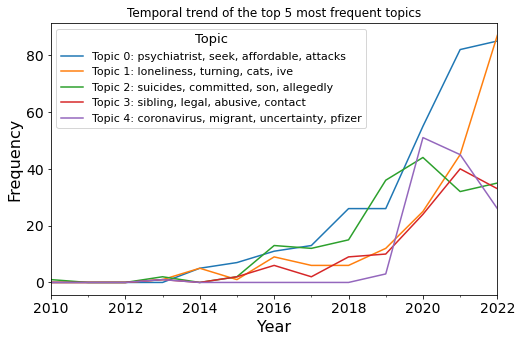

In [3]:


# Filter and resample
df_filtered = df[df['Topic'].isin([0, 1, 2, 3, 4])]
df_filtered.set_index('created_utc', inplace=True)
df_resampled = df_filtered.groupby('Name').resample('YE').size().unstack(level=0).fillna(0)

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()
df_resampled.plot(ax=ax)



plt.title('Temporal trend of the top 5 most frequent topics')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)  # Adjust x-axis tick font size
plt.yticks(fontsize=14)  # Adjust y-axis tick font size
plt.legend(title='Topic', fontsize=11, title_fontsize=13)

plt.xticks()  # Rotate for better readability
plt.savefig('plots/plot_topics.png', dpi=900, bbox_inches='tight') 
plt.show()

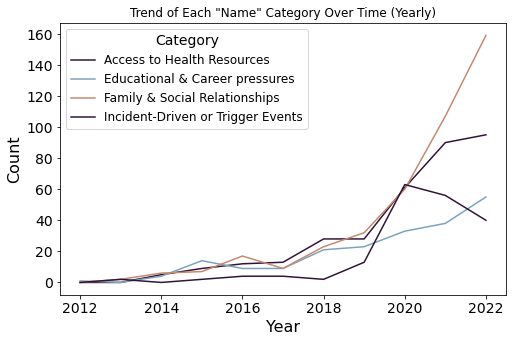

In [4]:
# Assuming 'created_utc' is already in datetime format
# Set 'created_utc' as the index if it isn't already
df.set_index('created_utc', inplace=True)

# Resample the data by year and count occurrences of each 'Name' category
df_resampled_theme = df.groupby('Theme').resample('YE').size().unstack(level=0).fillna(0)
df_resampled_theme.index=(df_resampled_theme.index).year
# Plotting
plt.figure(figsize=(8, 5))
ax2 = plt.gca()
df_resampled_theme.plot(ax=ax2, colormap='twilight_shifted')

plt.title('Trend of Each "Name" Category Over Time (Yearly)')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
# Customizing tick label size
plt.xticks(fontsize=14)  # Adjust x-axis tick font size
plt.yticks(fontsize=14)  # Adjust y-axis tick font size
plt.legend(title='Category', fontsize=12, title_fontsize=14)
plt.savefig('plots/plot_categories.png', dpi=900, bbox_inches='tight') 
plt.show()